# Module 2: Exercise A

In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In this exercise, we will apply a PCA model to the breast cancer dataset, reduce the dimensionality of the data, and subsequently fit a logistic regression model using both the original and reduced datasets.

## Data Preprocessing

Let’s begin by importing the data and creating some visualizations.

In [80]:
from sklearn.datasets import load_breast_cancer
X_bc, y_bc = load_breast_cancer(return_X_y=True, as_frame=True)
X_bc.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


>__Task 1__
>
>- Check unique values in `y_bc`
>- Plot the count of each class

target
1    357
0    212
Name: count, dtype: int64


<Axes: xlabel='target', ylabel='count'>

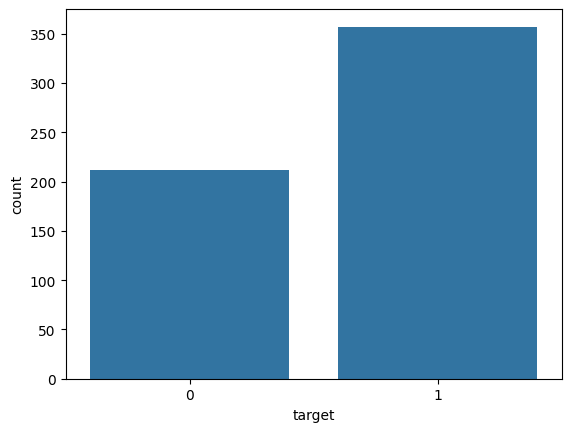

In [81]:
print(y_bc.value_counts())
# Plotting the distribution of the target variable
sns.countplot(x=y_bc)


### Split the Data

>__Task 2__
>
>Split the data into `X_train`, `X_test`, `y_train`, `y_test` 
>
>- Set a 80(train):20(test) ratio
>- Set 156 randomness and use stratified split

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_bc, y_bc, test_size=0.2, random_state=156, stratify=y_bc)

### Standardize the Data

>__Task 3__
>
>Standardize both train and test sets
>
>- Fit the scaler to the train set
>- Transform both train and test sets using the fitted scaler 

In [83]:
from sklearn.preprocessing import StandardScaler
#Not sure which scaler to use, but StandardScaler is a common choice
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## PCA Implementation

>__Task 4__
>
>- Fit a PCA model on the train set
>- Transform both train and test sets
>- Save the transformed data in DataFrame named `X_train_pca` and `X_test_pca` respectively
>- Check out the first 5 rows of the transformed data points in the test set

In [84]:
#Fit a PCA model on the training data
from sklearn.decomposition import PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

X_train_pca = pd.DataFrame(X_train_pca, columns=['PA%s'%i for i in range(30)])
X_test_pca = pd.DataFrame(X_test_pca, columns=['PA%s'%i for i in range(30)])


X_test_pca.head()



,PA0,PA1,PA2,PA3,PA4,PA5,PA6,PA7,PA8,PA9,...,PA20,PA21,PA22,PA23,PA24,PA25,PA26,PA27,PA28,PA29
0,2.790444,0.589478,-0.596094,-0.535393,-0.268089,-1.018104,-1.020964,0.147608,-0.729606,-0.755973,...,-0.418358,-0.170959,-0.021548,-0.167074,0.053131,-0.077712,0.034234,-0.035689,0.015671,0.012372
1,-1.721493,1.079954,-0.228953,-0.942461,1.536212,-0.627956,-0.262815,-0.305329,-0.332789,-0.198433,...,-0.042519,0.083510,0.052309,-0.101461,-0.156671,0.062520,-0.093082,-0.001285,-0.002295,0.007257
2,-2.039632,0.317425,-0.568426,0.497581,0.117768,-1.291312,0.455430,0.250485,-0.637945,0.202307,...,0.004203,-0.244172,-0.150892,-0.030699,0.039402,-0.039338,-0.029955,-0.021121,0.003279,0.001090
3,-2.712664,1.106718,1.736415,0.375546,-1.127114,1.548907,0.375983,-1.152130,-0.076888,-0.060419,...,0.239652,-0.072480,-0.100787,0.012950,-0.028015,0.069201,-0.041804,0.020527,0.017710,0.006019
4,-1.436610,0.422429,0.515166,-0.204160,2.447068,1.733403,-0.687220,-1.298511,-0.785322,1.062185,...,0.030187,-0.051170,0.041520,-0.070161,0.036783,-0.049611,-0.038658,-0.026260,0.000630,0.011413


>__Task 5__
>
>- Print the weight of the first feature (column) in the first principal component (PC)
>- Save PCs into a DataFrame and print out the first 5 PCs

In [85]:
pc_df = pd.DataFrame(pca.components_.T, columns=['PC%s'%i for i in range(30)])
pc_df.head()

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29
0,0.217829,-0.231229,-0.010149,-0.048135,-0.031302,0.024503,-0.145092,0.109803,0.159186,0.165455,...,-0.022253,0.011506,0.239516,0.131387,-0.003518,-0.166028,0.100397,-0.247441,-0.183307,-0.695948
1,0.097814,-0.072202,0.105933,0.599935,0.005302,-0.049953,0.004195,0.046949,-0.195529,0.165716,...,-0.281078,-0.354753,-0.249302,-0.082589,-0.084216,-0.017265,0.013433,0.004613,0.003855,-0.001830
2,0.226372,-0.212549,-0.010488,-0.048061,-0.032597,0.019672,-0.138077,0.101213,0.167859,0.155945,...,-0.025457,0.064542,0.195727,0.076590,-0.036101,-0.153900,0.074286,-0.120863,-0.351140,0.697284
3,0.219749,-0.228507,0.020840,-0.056114,0.000378,0.000501,-0.077940,0.142252,0.141242,0.169537,...,-0.013759,0.014539,0.063912,-0.058017,0.273539,0.478249,-0.345481,0.297099,0.397228,0.019665
4,0.135652,0.199660,-0.131295,-0.128314,0.384264,-0.242231,-0.168965,-0.261239,0.158564,-0.020629,...,-0.004954,0.048737,0.043251,-0.100734,-0.029148,-0.023036,-0.088746,-0.002339,0.005538,0.005676


### Visualize the Explained Variance

>__Task 6__
>
>- Print the amount of variance explained by PCs
>- Print the proportion of the variance explained

In [86]:
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

[1.34942743e+01 5.72371702e+00 2.72997579e+00 1.98648545e+00
 1.63728673e+00 1.19660438e+00 6.56975066e-01 4.71257880e-01
 4.19719655e-01 3.27355974e-01 3.01233225e-01 2.61215473e-01
 2.27524467e-01 1.52676623e-01 8.66969617e-02 7.83636960e-02
 5.70588973e-02 5.08604056e-02 4.27542610e-02 3.35234590e-02
 2.79997651e-02 2.72725715e-02 2.23925640e-02 1.98699599e-02
 1.54631369e-02 8.06323460e-03 7.11220415e-03 1.55580179e-03
 6.73281370e-04 1.17045651e-04]
[4.48820552e-01 1.90371247e-01 9.07991948e-02 6.60706517e-02
 5.44562766e-02 3.97991494e-02 2.18510388e-02 1.56740716e-02
 1.39599065e-02 1.08878837e-02 1.00190391e-02 8.68804575e-03
 7.56748045e-03 5.07803567e-03 2.88354730e-03 2.60638227e-03
 1.89778310e-03 1.69162082e-03 1.42200985e-03 1.11499270e-03
 9.31274240e-04 9.07087727e-04 7.44778318e-04 6.60876321e-04
 5.14305067e-04 2.68183774e-04 2.36552431e-04 5.17460816e-05
 2.23933877e-05 3.89294694e-06]


>__Task 7__
>
>Create a scree plot to visualize the proportion of the variance explained

Text(0.5, 1.0, 'Screeplot of Explained Variance Ratio')

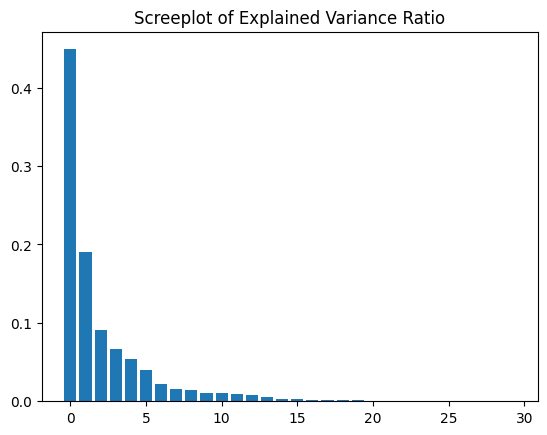

In [87]:
plt.bar(x=range(30), height=pca.explained_variance_ratio_)
plt.title('Screeplot of Explained Variance Ratio')

>__Task 8__
>
>Create a line plot to show the cumulative variability
>
>How many principal axes (columns) are necessary to explain 90% variability in the data?

Text(0.5, 1.0, 'Cumulative Variability')

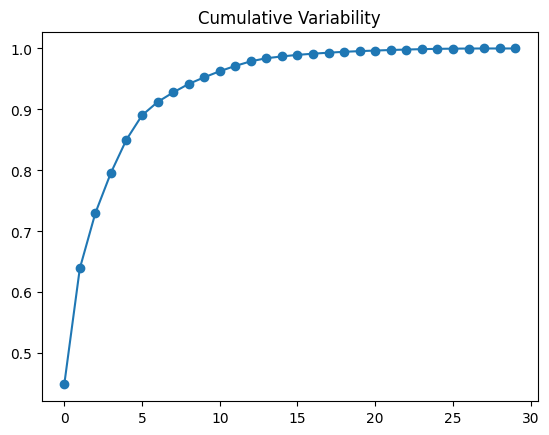

In [88]:
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title('Cumulative Variability')

# About 5 PCs explain 90% of the variance

Let’s plot the first two principal components and check whether the 2D representation effectively captures and distinguishes the variability in the data.

>__Task 9__
>
>Visualize the first two PCs (Hint: use scatter plot from seaborn and set `hue`)

Text(0.5, 1.0, 'PCA Scatter Plot of Test Data')

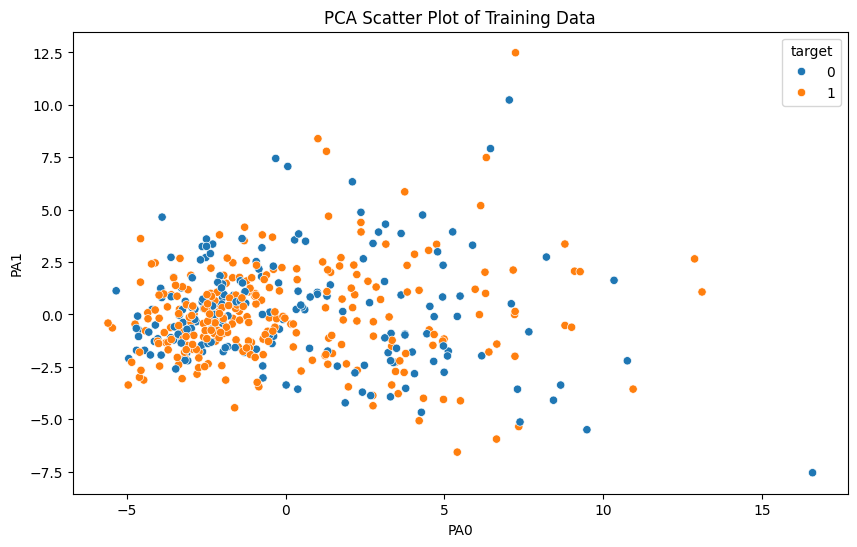

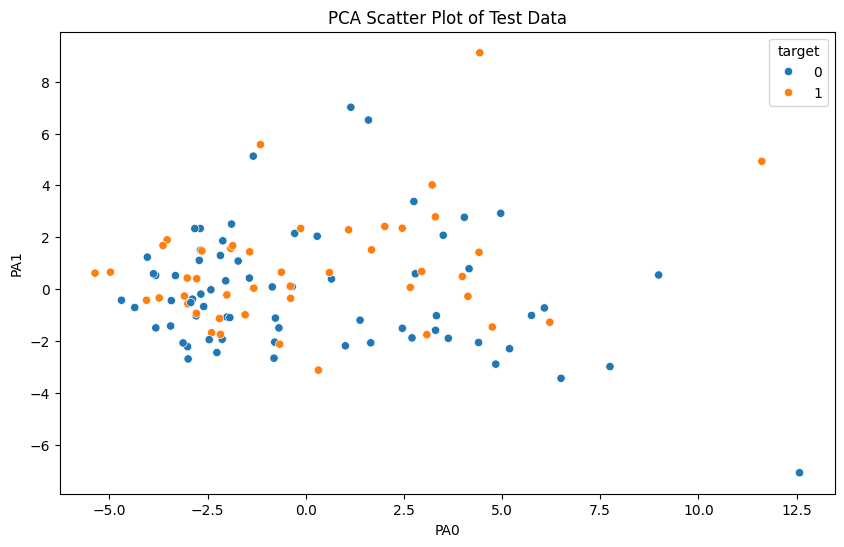

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=X_train_pca, x='PA0', y='PA1', hue=y_bc)
plt.title('PCA Scatter Plot of Training Data')
#two seperate plots for training and test data
plt.figure(figsize=(10, 6))
sns.scatterplot(data=X_test_pca, x='PA0', y='PA1', hue=y_bc)
plt.title('PCA Scatter Plot of Test Data')

#Not sure on either of these plots. Does not look like a good separation

From data visualization, we can see that the transformed 2D data can differentiate between class 0 and class 1 to some extent. Let’s proceed with the actual models.

## Logistic Regression Model

>__Task 10__
>
>Implement a logistic regression model on the __original data__
>
>- Fit a logistic regression model on the train set
>- Make predictions on the test set
>- Calculate the *accuracy*, *precision* and *recall* using predictions and actual target values

In [90]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=10000, random_state=156)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
from sklearn.metrics import accuracy_score, precision_score, recall_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print("accuracy: ", round(accuracy,3))
print("precision: ", round(precision,3))
print("recall: ", round(recall,3))


accuracy:  0.982
precision:  0.986
recall:  0.986


>__Task 11__
>
>Implement a logistic regression model on the __transformed data by PCA__
>
>- Fit a logistic regression model on the train set
>- Make predictions on the test set
>- Calculate the *accuracy*, *precision* and *recall* using predictions and actual target values

In [91]:
log_reg_pca = LogisticRegression(max_iter=10000, random_state=156)
log_reg_pca.fit(X_train_pca, y_train)
y_pred_pca = log_reg_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)
precision_pca = precision_score(y_test, y_pred_pca)
recall_pca = recall_score(y_test, y_pred_pca)
print("accuracy (PCA): ", round(accuracy_pca, 3))
print("precision (PCA): ", round(precision_pca, 3))
print("recall (PCA): ", round(recall_pca, 3))

accuracy (PCA):  0.974
precision (PCA):  0.973
recall (PCA):  0.986


>__Task 12__
>
>Implement a logistic regression model on the __first 5 columns of the transformed data by PCA__
>
>- Fit a logistic regression model on the train set
>- Make predictions on the test set
>- Calculate the *accuracy*, *precision* and *recall* using predictions and actual target values

In [92]:
log_reg_pca_5 = LogisticRegression(max_iter=10000, random_state=156)
log_reg_pca_5.fit(X_train_pca.iloc[:, :5], y_train)
y_pred_pca_5 = log_reg_pca_5.predict(X_test_pca.iloc[:, :5])
accuracy_pca_5 = accuracy_score(y_test, y_pred_pca_5)
precision_pca_5 = precision_score(y_test, y_pred_pca_5)
recall_pca_5 = recall_score(y_test, y_pred_pca_5)
print("accuracy (PCA with 5 components): ", round(accuracy_pca_5, 3))
print("precision (PCA with 5 components): ", round(precision_pca_5, 3))
print("recall (PCA with 5 components): ", round(recall_pca_5, 3))

accuracy (PCA with 5 components):  0.965
precision (PCA with 5 components):  0.972
recall (PCA with 5 components):  0.972


>__Task 13__
>
>Implement a logistic regression model on the __first 2 columns of the transformed data by PCA__
>
>- Fit a logistic regression model on the train set
>- Make predictions on the test set
>- Calculate the *accuracy*, *precision* and *recall* using predictions and actual target values

In [93]:
log_reg_pca_2 = LogisticRegression(max_iter=10000, random_state=156)
log_reg_pca_2.fit(X_train_pca.iloc[:, :2], y_train)
y_pred_pca_2 = log_reg_pca_2.predict(X_test_pca.iloc[:, :2])
accuracy_pca_2 = accuracy_score(y_test, y_pred_pca_2)
precision_pca_2 = precision_score(y_test, y_pred_pca_2)
recall_pca_2 = recall_score(y_test, y_pred_pca_2)
print("accuracy (PCA with 2 components): ", round(accuracy_pca_2, 3))
print("precision (PCA with 2 components): ", round(precision_pca_2, 3))
print("recall (PCA with 2 components): ", round(recall_pca_2, 3))

accuracy (PCA with 2 components):  0.974
precision (PCA with 2 components):  0.986
recall (PCA with 2 components):  0.972
